# **Tugas**

- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
- Buatlah model CNN untuk klasifikasi dataset MNIST.

In [ ]:
# Import Library

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# Normalisasi

train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Model CNN

from tensorflow.keras.layers import BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.35))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

In [ ]:
# Fit Model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

initial_learning_rate = 0.001

lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.9 ** epoch)

# Add this line before model.compile
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))


model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_schedule])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 52s 23ms/step - loss: 1.5607 - accuracy: 0.4652 - val_loss: 1.5062 - val_accuracy: 0.4791 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9399 - accuracy: 0.6708 - val_loss: 0.9194 - val_accuracy: 0.6889 - lr: 9.0000e-04
Epoch 3/50
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7388 - accuracy: 0.7458 - val_loss: 0.8102 - val_accuracy: 0.7284 - lr: 8.1000e-04
Epoch 4/50
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6159 - accuracy: 0.7901 - val_loss: 0.6009 - val_accuracy: 0.7955 - lr: 7.2900e-04
Epoch 5/50
1563/1563 [==============================] - 35s 22ms/step - loss: 0.5137 - accuracy: 0.8247 - val_loss: 0.6625 - val_accuracy: 0.7783 - lr: 6.5610e-04
Epoch 6/50
1563/1563 [==============================] - 35s 22ms/step - loss: 0.4375 - accuracy: 0.8505 - val_loss: 0.5218 - val_accuracy: 0.8276 - lr: 5.9049e-04
Epoch 7/50
1563/1563 [===============

313/313 - 3s - loss: 0.6198 - accuracy: 0.8758 - 3s/epoch - 8ms/step


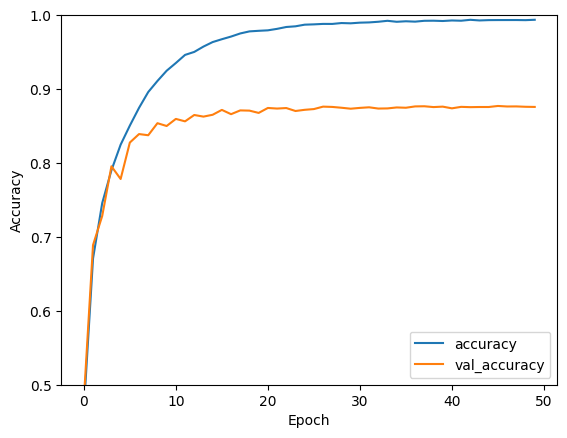

In [ ]:
# Evaluasi Model

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## **Model CNN untuk klasifikasi dataset MNIST.**

In [35]:
# Load Library
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [36]:
# Load Dataset Mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [37]:
# Pre-processing Data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [38]:
# Model CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [39]:
# Compile Model CNN
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Changed to categorical_crossentropy
              metrics=['accuracy'])

In [40]:
# Fit Model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 8s 7ms/step - loss: 0.2009 - accuracy: 0.9390 - val_loss: 0.0663 - val_accuracy: 0.9792
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.0390 - val_accuracy: 0.9873
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.0370 - val_accuracy: 0.9880
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0418 - val_accuracy: 0.9872
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.0353 - val_accuracy: 0.9888
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0283 - val_accuracy: 0.9904
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0321 - val_accuracy: 0.9899
Epoch 

313/313 - 1s - loss: 0.0329 - accuracy: 0.9910 - 757ms/epoch - 2ms/step


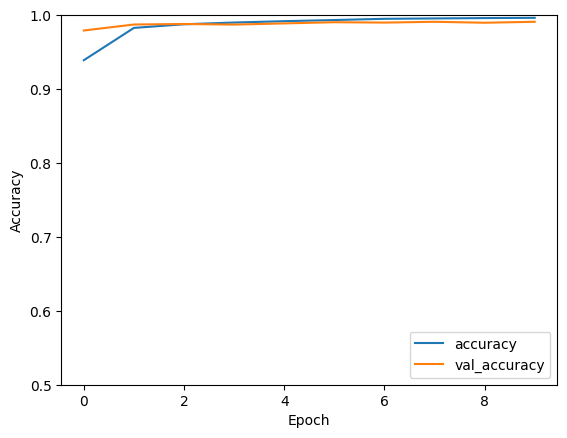

In [44]:
# Evaluasi Model

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [45]:
# Test Akurasi
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9909999966621399
